In [1]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import log_loss, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,3)

In [2]:
class evaluation:
    def __init__(self, true_s):
        self.true_df = pd.DataFrame(true_s)
        self.true_df.columns = ['swell']
        self.true_df['swell(t+1)'] = self.true_df['swell'].shift(-1)
        self.true_df['swell(t+2)'] = self.true_df['swell'].shift(-2)
        self.true_df['swell(t-1)'] = self.true_df['swell'].shift(1)
        self.true_df['swell(t-2)'] = self.true_df['swell'].shift(2)
    
        self.swell_columns = ['swell(t+1)','swell(t+2)','swell(t-1)','swell(t-2)']
    
    def _eval_one(self, pred):
        true = self.true_df.loc[pred.name]
        swell = true['swell'] 
        p_swell = pred['pred']

        if swell == 0 and p_swell == 0:
            return 1, 1

        if swell == 1 and p_swell == 1:
            return 2, 2

        if swell == 0 and p_swell == 1:
            if (true[self.swell_columns].values == 1).any():
                return 0, 1
            else:
                return -1, 1

        if swell == 1 and p_swell == 0:
            if (pred[self.swell_columns].values == 1).any():
                return 0, 2
            else: 
                return -2, 2
    
    def evaluate(self, pred):
        pred_df = pd.DataFrame(pred)
        pred_df.columns = ['pred']
        pred_df['swell(t+1)'] = pred_df['pred'].shift(-1)
        pred_df['swell(t+2)'] = pred_df['pred'].shift(-2)
        pred_df['swell(t-1)'] = pred_df['pred'].shift(1)
        pred_df['swell(t-2)'] = pred_df['pred'].shift(2)

        result = []
        for index in pred_df.index:
            result.append(self._eval_one(pred_df.loc[index]))
        
        
        #print(result)
        print(pd.DataFrame(result)[0].value_counts())
        
        return np.sum(pd.DataFrame(result)[0]), np.sum(pd.DataFrame(result)[1])

In [3]:
num_values = 7
degrees_week = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_week)
sin_week = np.sin(np.deg2rad(degrees_week))
print(sin_week)
cos_week = np.cos(np.deg2rad(degrees_week))
print(cos_week)

num_values = 12
degrees_month = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_month)
sin_month = np.sin(np.deg2rad(degrees_month))
print(sin_month)
cos_month = np.cos(np.deg2rad(degrees_month))
print(cos_month)

num_values = 31
degrees_day = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_day)
sin_day = np.sin(np.deg2rad(degrees_day))
print(sin_day)
cos_day = np.cos(np.deg2rad(degrees_day))
print(cos_day)

num_values = 24
degrees_hour = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_hour)
sin_hour = np.sin(np.deg2rad(degrees_hour))
print(sin_hour)
cos_hour = np.cos(np.deg2rad(degrees_hour))
print(cos_hour)

[   0.           51.42857143  102.85714286  154.28571429  205.71428571
  257.14285714  308.57142857]
[ 0.          0.78183148  0.97492791  0.43388374 -0.43388374 -0.97492791
 -0.78183148]
[ 1.          0.6234898  -0.22252093 -0.90096887 -0.90096887 -0.22252093
  0.6234898 ]
[   0.   30.   60.   90.  120.  150.  180.  210.  240.  270.  300.  330.]
[  0.00000000e+00   5.00000000e-01   8.66025404e-01   1.00000000e+00
   8.66025404e-01   5.00000000e-01   1.22464680e-16  -5.00000000e-01
  -8.66025404e-01  -1.00000000e+00  -8.66025404e-01  -5.00000000e-01]
[  1.00000000e+00   8.66025404e-01   5.00000000e-01   6.12323400e-17
  -5.00000000e-01  -8.66025404e-01  -1.00000000e+00  -8.66025404e-01
  -5.00000000e-01  -1.83697020e-16   5.00000000e-01   8.66025404e-01]
[   0.           11.61290323   23.22580645   34.83870968   46.4516129
   58.06451613   69.67741935   81.29032258   92.90322581  104.51612903
  116.12903226  127.74193548  139.35483871  150.96774194  162.58064516
  174.19354839  185.806

In [4]:
def make_coord(date,num_class):
    # 1 ~ 12, 1 ~ 7, 1 ~ 31
    degrees = np.linspace(0,360,num_values + 1)[:-1]
    sin = np.sin(np.deg2rad(degrees))
    cos = np.cos(np.deg2rad(degrees))
    return sin, cos


def date2coord(date, sin, cos):
    return cos[date-1], sin[date-1]


def date2week(x):
    y = int(str(x)[:4])
    m = int(str(x)[4:6])
    d = int(str(x)[6:8])
    day = datetime(y, m, d)
    return day.weekday()

In [5]:
df = pd.read_csv('./merged_info_data.tsv',sep='\t',index_col='Unnamed: 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34992 entries, 0 to 34991
Data columns (total 65 columns):
hour                     34992 non-null int64
climate                  34992 non-null object
weather_deterioration    34992 non-null int64
swell                    34392 non-null float64
21229_GUST풍속 1(m/s)      8637 non-null float64
21229_GUST풍속(m/s)        26091 non-null float64
21229_기온(°C)             33915 non-null float64
21229_수온(°C)             34629 non-null float64
21229_습도(%)              33939 non-null float64
21229_유의파고(m)            34700 non-null float64
21229_일시                 34817 non-null float64
21229_최대파고(m)            34788 non-null float64
21229_파주기(sec)           34800 non-null float64
21229_파향(deg)            34808 non-null float64
21229_평균파고(m)            34606 non-null float64
21229_풍속(m/s)            26122 non-null float64
21229_풍속1(m/s)           8638 non-null float64
21229_풍향(deg)            26121 non-null float64
21229_풍향1(deg)           8639 non-

In [6]:
df['swell'].value_counts()

0.0    31800
1.0     2592
Name: swell, dtype: int64

In [7]:
#df['swell'] = df['swell'] + df['weather_deterioration']

In [8]:
df['swell'].value_counts()

0.0    31800
1.0     2592
Name: swell, dtype: int64

In [9]:
df['month'] = df['hour'].apply(lambda x:int(str(x)[4:6]))
df['day'] = df['hour'].apply(lambda x:int(str(x)[6:8]))
df['day_hour'] = df['hour'].apply(lambda x:int((str(x)[8:])))
df['week'] = df['hour'].apply(date2week)
df['week'] = df['week'] + 1 
df['year'] = df['hour'].apply(lambda x:int(str(x)[:4]))

In [10]:
df['day_coord'] = df['day'].apply(date2coord, args=(sin_day, cos_day,))
df['month_coord'] = df['month'].apply(date2coord, args=(sin_month, cos_month))
df['week_coord'] = df['week'].apply(date2coord, args=(sin_week, cos_week,))
df['hour_coord'] = df['day_hour'].apply(date2coord, args=(sin_hour, cos_hour,))

In [11]:
s = (df[df['swell'].isnull()]['hour']//100).value_counts()
s

20170315    17
20171211    17
20161130    17
20170331    17
20141023    17
20161020    17
20140518    17
20170212    17
20150718    17
20140706    17
20150627    17
20160830    17
20171023    17
20171012    17
20141221    17
20170916    17
20160122    17
20150404    17
20150113    17
20140925    17
20170603    17
20161226    17
20151213    17
20160304    17
20151113    17
20160831     7
20170604     7
20171024     7
20140926     7
20171013     7
20150114     7
20141222     7
20151214     7
20150405     7
20150628     7
20140707     7
20150719     7
20170401     7
20171212     7
20170917     7
20151114     7
20170213     7
20140519     7
20160305     7
20161021     7
20170316     7
20161227     7
20161201     7
20160123     7
20141024     7
Name: hour, dtype: int64

In [12]:
s[s > 10].index.tolist()[0]

20170315

In [13]:
def get_prev_date(today):
    today = date(int(today[:4]),int(today[4:6]),int(today[6:]))
    return (today - timedelta(1)).strftime('%Y%m%d%H')

In [14]:
def get_today_from_07(today):
    today = date(int(today[:4]),int(today[4:6]),int(today[6:]))
    return today.strftime('%Y%m%d%H')

In [15]:
get_prev_date('20170101')

'2016123100'

In [16]:
get_today_from_07('20170101')

'2017010100'

In [17]:
s[s>10].index.astype(str).sort_values()

Index(['20140518', '20140706', '20140925', '20141023', '20141221', '20150113',
       '20150404', '20150627', '20150718', '20151113', '20151213', '20160122',
       '20160304', '20160830', '20161020', '20161130', '20161226', '20170212',
       '20170315', '20170331', '20170603', '20170916', '20171012', '20171023',
       '20171211'],
      dtype='object')

In [18]:
test_date_hour = []
for d in s[s>10].index.astype(str):
    #day = get_prev_date(d)
    day = get_prev_date(d)
    tomorrow_day = int(day) +  100 
    
    if tomorrow_day == 2016113100:
        tomorrow_day = 2016120100

    if tomorrow_day == 2017033200:
        tomorrow_day = 2017040100
        
    print(day, tomorrow_day)
    for hour in range(7,24):
        test_date_hour.append((int(day) + hour))
            
    for hour in range(0,7):
        test_date_hour.append((tomorrow_day + hour))

test_date_hour = list(map(str,test_date_hour))
len(test_date_hour)

2017031400 2017031500
2017121000 2017121100
2016112900 2016113000
2017033000 2017033100
2014102200 2014102300
2016101900 2016102000
2014051700 2014051800
2017021100 2017021200
2015071700 2015071800
2014070500 2014070600
2015062600 2015062700
2016082900 2016083000
2017102200 2017102300
2017101100 2017101200
2014122000 2014122100
2017091500 2017091600
2016012100 2016012200
2015040300 2015040400
2015011200 2015011300
2014092400 2014092500
2017060200 2017060300
2016122500 2016122600
2015121200 2015121300
2016030300 2016030400
2015111200 2015111300


600

In [19]:
df['swell(t+1)'] = df['swell'].shift(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34992 entries, 0 to 34991
Data columns (total 75 columns):
hour                     34992 non-null int64
climate                  34992 non-null object
weather_deterioration    34992 non-null int64
swell                    34392 non-null float64
21229_GUST풍속 1(m/s)      8637 non-null float64
21229_GUST풍속(m/s)        26091 non-null float64
21229_기온(°C)             33915 non-null float64
21229_수온(°C)             34629 non-null float64
21229_습도(%)              33939 non-null float64
21229_유의파고(m)            34700 non-null float64
21229_일시                 34817 non-null float64
21229_최대파고(m)            34788 non-null float64
21229_파주기(sec)           34800 non-null float64
21229_파향(deg)            34808 non-null float64
21229_평균파고(m)            34606 non-null float64
21229_풍속(m/s)            26122 non-null float64
21229_풍속1(m/s)           8638 non-null float64
21229_풍향(deg)            26121 non-null float64
21229_풍향1(deg)           8639 non-

In [20]:
df.columns

Index(['hour', 'climate', 'weather_deterioration', 'swell',
       '21229_GUST풍속 1(m/s)', '21229_GUST풍속(m/s)', '21229_기온(°C)',
       '21229_수온(°C)', '21229_습도(%)', '21229_유의파고(m)', '21229_일시',
       '21229_최대파고(m)', '21229_파주기(sec)', '21229_파향(deg)', '21229_평균파고(m)',
       '21229_풍속(m/s)', '21229_풍속1(m/s)', '21229_풍향(deg)', '21229_풍향1(deg)',
       '21229_현지기압(hPa)', '22105_GUST풍속 1(m/s)', '22105_GUST풍속(m/s)',
       '22105_기온(°C)', '22105_수온(°C)', '22105_습도(%)', '22105_유의파고(m)',
       '22105_일시', '22105_최대파고(m)', '22105_파주기(sec)', '22105_파향(deg)',
       '22105_평균파고(m)', '22105_풍속(m/s)', '22105_풍속1(m/s)', '22105_풍향(deg)',
       '22105_풍향1(deg)', '22105_현지기압(hPa)', '22106_GUST풍속 1(m/s)',
       '22106_GUST풍속(m/s)', '22106_기온(°C)', '22106_수온(°C)', '22106_습도(%)',
       '22106_유의파고(m)', '22106_일시', '22106_최대파고(m)', '22106_파주기(sec)',
       '22106_파향(deg)', '22106_평균파고(m)', '22106_풍속(m/s)', '22106_풍속1(m/s)',
       '22106_풍향(deg)', '22106_풍향1(deg)', '22106_현지기압(hPa)', '22190_일시',
   

In [21]:
def output_change(x):
    if x == 2:
        return 1
    else:
        return 0

In [22]:
df['hour'] = df['hour'].astype(str)
df['index'] = df.index
df.set_index('hour',inplace=True,)

In [23]:
scale_features = ['21229_파주기(sec)','22105_파주기(sec)','22106_파주기(sec)','22106_현지기압(hPa)']
#['swell']#,'22453_파주기(sec)','22106_파주기(sec)','22106_현지기압(hPa)']
nor_features = []#['month_coord']#,'hour_coord']
index_feature = ['index']
target = ['swell(t+1)']

In [24]:
minmax_scaler = MinMaxScaler(copy=True, feature_range=(0,1))
temp_df = df[index_feature+scale_features+nor_features+target]

minmax_scaler.fit(temp_df[scale_features].dropna())

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
temp_df.fillna(method='ffill',inplace=True)

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [26]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34992 entries, 2014010407 to 2018010106
Data columns (total 6 columns):
index              34992 non-null int64
21229_파주기(sec)     34992 non-null float64
22105_파주기(sec)     34992 non-null float64
22106_파주기(sec)     34992 non-null float64
22106_현지기압(hPa)    34992 non-null float64
swell(t+1)         34992 non-null float64
dtypes: float64(5), int64(1)
memory usage: 1.9+ MB


### make lstm data set

In [27]:
in_seq = 12

In [28]:
cols = list()
names = list()
for i in range(in_seq, 0, -1):
    cols.append(temp_df[scale_features].shift(i))
    names += [(feature_name+'(t-%d)' % i) for feature_name in scale_features]

In [29]:
lstm_df = pd.concat(cols,axis=1)
lstm_df.columns = names
lstm_df['index'] = temp_df['index']
lstm_df['swell(t+1)'] = temp_df['swell(t+1)']
lstm_df.dropna(inplace=True)

In [30]:
lstm_df

,21229_파주기(sec)(t-12),22105_파주기(sec)(t-12),22106_파주기(sec)(t-12),22106_현지기압(hPa)(t-12),21229_파주기(sec)(t-11),22105_파주기(sec)(t-11),22106_파주기(sec)(t-11),22106_현지기압(hPa)(t-11),21229_파주기(sec)(t-10),22105_파주기(sec)(t-10),...,21229_파주기(sec)(t-2),22105_파주기(sec)(t-2),22106_파주기(sec)(t-2),22106_현지기압(hPa)(t-2),21229_파주기(sec)(t-1),22105_파주기(sec)(t-1),22106_파주기(sec)(t-1),22106_현지기압(hPa)(t-1),index,swell(t+1)
hour,,,,,,,,,,,,,,,,,,,,,
2014010419,5.8,6.4,5.8,1016.5,6.4,6.4,5.3,1016.7,8.0,6.4,...,8.0,9.1,8.0,1018.2,8.0,8.0,8.0,1018.5,12,0.0
2014010420,6.4,6.4,5.3,1016.7,8.0,6.4,5.8,1017.1,7.1,8.0,...,8.0,8.0,8.0,1018.5,8.0,6.4,8.0,1018.9,13,0.0
2014010421,8.0,6.4,5.8,1017.1,7.1,8.0,6.4,1017.6,6.4,7.1,...,8.0,6.4,8.0,1018.9,8.0,8.0,9.1,1018.8,14,0.0
2014010422,7.1,8.0,6.4,1017.6,6.4,7.1,6.4,1017.8,8.0,7.1,...,8.0,8.0,9.1,1018.8,8.0,8.0,9.1,1018.9,15,0.0
2014010423,6.4,7.1,6.4,1017.8,8.0,7.1,7.1,1017.5,8.0,7.1,...,8.0,8.0,9.1,1018.9,7.1,8.0,8.0,1019.0,16,0.0
2014010500,8.0,7.1,7.1,1017.5,8.0,7.1,6.4,1017.3,8.0,8.0,...,7.1,8.0,8.0,1019.0,8.0,8.0,7.1,1019.2,17,0.0
2014010501,8.0,7.1,6.4,1017.3,8.0,8.0,8.0,1017.0,8.0,8.0,...,8.0,8.0,7.1,1019.2,8.0,8.0,8.0,1019.1,18,0.0
2014010502,8.0,8.0,8.0,1017.0,8.0,8.0,8.0,1017.1,9.1,9.1,...,8.0,8.0,8.0,1019.1,8.0,8.0,8.0,1019.2,19,0.0
2014010503,8.0,8.0,8.0,1017.1,9.1,9.1,8.0,1017.7,8.0,9.1,...,8.0,8.0,8.0,1019.2,8.0,7.1,6.4,1019.4,20,0.0


In [31]:
train = lstm_df.drop(test_date_hour).dropna()
test = lstm_df.loc[test_date_hour]
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34380 entries, 2014010419 to 2018010106
Data columns (total 50 columns):
21229_파주기(sec)(t-12)     34380 non-null float64
22105_파주기(sec)(t-12)     34380 non-null float64
22106_파주기(sec)(t-12)     34380 non-null float64
22106_현지기압(hPa)(t-12)    34380 non-null float64
21229_파주기(sec)(t-11)     34380 non-null float64
22105_파주기(sec)(t-11)     34380 non-null float64
22106_파주기(sec)(t-11)     34380 non-null float64
22106_현지기압(hPa)(t-11)    34380 non-null float64
21229_파주기(sec)(t-10)     34380 non-null float64
22105_파주기(sec)(t-10)     34380 non-null float64
22106_파주기(sec)(t-10)     34380 non-null float64
22106_현지기압(hPa)(t-10)    34380 non-null float64
21229_파주기(sec)(t-9)      34380 non-null float64
22105_파주기(sec)(t-9)      34380 non-null float64
22106_파주기(sec)(t-9)      34380 non-null float64
22106_현지기압(hPa)(t-9)     34380 non-null float64
21229_파주기(sec)(t-8)      34380 non-null float64
22105_파주기(sec)(t-8)      34380 non-null float64
22106_파주기(sec)(t-8

In [32]:
#test['swell(t+1)']=np.NaN

In [33]:
test

,21229_파주기(sec)(t-12),22105_파주기(sec)(t-12),22106_파주기(sec)(t-12),22106_현지기압(hPa)(t-12),21229_파주기(sec)(t-11),22105_파주기(sec)(t-11),22106_파주기(sec)(t-11),22106_현지기압(hPa)(t-11),21229_파주기(sec)(t-10),22105_파주기(sec)(t-10),...,21229_파주기(sec)(t-2),22105_파주기(sec)(t-2),22106_파주기(sec)(t-2),22106_현지기압(hPa)(t-2),21229_파주기(sec)(t-1),22105_파주기(sec)(t-1),22106_파주기(sec)(t-1),22106_현지기압(hPa)(t-1),index,swell(t+1)
hour,,,,,,,,,,,,,,,,,,,,,
2017031407,7.1,7.1,5.8,1016.3,7.1,6.4,6.4,1017.2,7.1,7.1,...,7.1,6.4,8.0,1015.7,6.4,6.4,8.0,1015.7,27960,0.0
2017031408,7.1,6.4,6.4,1017.2,7.1,7.1,7.1,1016.9,8.0,6.4,...,6.4,6.4,8.0,1015.7,6.4,8.0,8.0,1016.1,27961,0.0
2017031409,7.1,7.1,7.1,1016.9,8.0,6.4,7.1,1016.4,7.1,8.0,...,6.4,8.0,8.0,1016.1,5.3,7.1,7.1,1016.2,27962,0.0
2017031410,8.0,6.4,7.1,1016.4,7.1,8.0,6.4,1016.3,6.4,8.0,...,5.3,7.1,7.1,1016.2,7.1,6.4,7.1,1016.5,27963,0.0
2017031411,7.1,8.0,6.4,1016.3,6.4,8.0,7.1,1017.2,7.1,7.1,...,7.1,6.4,7.1,1016.5,7.1,7.1,7.1,1016.7,27964,0.0
2017031412,6.4,8.0,7.1,1017.2,7.1,7.1,7.1,1017.2,8.0,8.0,...,7.1,7.1,7.1,1016.7,8.0,7.1,7.1,1016.7,27965,0.0
2017031413,7.1,7.1,7.1,1017.2,8.0,8.0,7.1,1017.0,7.1,8.0,...,8.0,7.1,7.1,1016.7,8.0,6.4,6.4,1016.4,27966,0.0
2017031414,8.0,8.0,7.1,1017.0,7.1,8.0,7.1,1016.5,7.1,7.1,...,8.0,6.4,6.4,1016.4,7.1,7.1,7.1,1016.2,27967,0.0
2017031415,7.1,8.0,7.1,1016.5,7.1,7.1,7.1,1016.0,7.1,6.4,...,7.1,7.1,7.1,1016.2,7.1,8.0,6.4,1015.8,27968,0.0


In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

In [35]:
from keras.layers import Input, LSTM, Dense
from keras.models import Model

Using TensorFlow backend.


In [36]:
def baseline_model(shape, batch_size):
    main_input = Input(shape=(shape[1], shape[2]),
                       batch_shape=(batch_size, shape[1], shape[2]), name='main_input')

    x = LSTM(32, return_sequences=True, stateful=True)(main_input)
    x = LSTM(16, stateful=True)(x)

    x = Dense(16, activation='relu')(x)
    x = Dense(8, activation='relu')(x)

    main_output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=main_input, outputs=main_output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse'])

    return model

In [37]:
[str(2015111200 + i) for i in range(7,24)]

['2015111207',
 '2015111208',
 '2015111209',
 '2015111210',
 '2015111211',
 '2015111212',
 '2015111213',
 '2015111214',
 '2015111215',
 '2015111216',
 '2015111217',
 '2015111218',
 '2015111219',
 '2015111220',
 '2015111221',
 '2015111222',
 '2015111223']

In [38]:
pred_result = []
for index in test.index:
    if not (index in [str(2015111200 + i) for i in range(7,24)]):
        continue
    order_index = test.loc[index]['index']
    print(index, order_index)
    train_before_test = train[train['index']<order_index]
    #print(len(train_before_test))
    test_row = pd.DataFrame(test.loc[index]).T
    cluster_df = train_before_test
    size = len(cluster_df)
    add_size = 32 - size%32 
    
    cluster_df = pd.concat([cluster_df,cluster_df.sample(add_size)])
    cluster_df = pd.concat([cluster_df,test_row])
    
    train_X = minmax_scale(cluster_df.drop(['index','swell(t+1)'],axis=1).values)
    test_X = train_X[-1].reshape(-1,in_seq,len(scale_features))
    train_X = train_X[:-1]

    x_list = []
    for col in nor_features:
        X_arr = np.array(cluster_df[col].apply(lambda x:np.array(x)).tolist())
        x_list.append(X_arr)
    
    model = baseline_model((-1,in_seq,len(scale_features)),32)
    train_X = train_X.reshape(len(cluster_df)-1, in_seq, len(scale_features))
    train_y = cluster_df.iloc[:-1]['swell(t+1)'].values.reshape(-1,1)

    model.fit(train_X,train_y,batch_size=32,epochs=10)
    
    ####################
    # remove top layer #
    ####################
    
    prev_layer = model.layers[-2].output
    new_model = Model(inputs=model.input, outputs=prev_layer)
    
    cls_train_X = new_model.predict(train_X)
    
    test_X = np.concatenate([test_X,np.zeros((31,in_seq, len(scale_features)))])
    cls_test_X = new_model.predict(test_X)[0].reshape(1,8)
    
    print(cls_train_X.shape, cls_test_X.shape)
    
    cls_train_X = np.concatenate([cls_train_X,cls_test_X])
    
    print(cls_train_X.shape)
    
    ##################
    # train k-means  #
    ##################
    
    K = 3

    kmeans = KMeans(n_clusters=K,max_iter=1000)
    pred = kmeans.fit_predict(cls_train_X)
    print(pred)
    cluster_df['pred'] = pred
    print(cluster_df.groupby(['pred','swell(t+1)']).count()[['index']])
    
    pred_num = cluster_df['pred'].value_counts()
    
    swell_num = []
    for i in range(K):
        swell_num.append(len(cluster_df[(cluster_df['pred'] == i) & (cluster_df['swell(t+1)']==1)]))

    test_pred = int(cluster_df.loc[index]['pred'])
    print(test_pred , swell_num[test_pred] / pred_num.loc[test_pred])
    pred_result.append((test_pred , swell_num[test_pred] / pred_num.loc[test_pred],cluster_df.loc[index]['swell(t+1)']))

2015111207 16248.0
Epoch 1/10
16032/16032 [==============================] - 21s - loss: 0.2206 - mean_squared_error: 0.0631    
Epoch 2/10
16032/16032 [==============================] - 20s - loss: 0.1719 - mean_squared_error: 0.0505    
Epoch 3/10
16032/16032 [==============================] - 21s - loss: 0.1683 - mean_squared_error: 0.0499    
Epoch 4/10
16032/16032 [==============================] - 21s - loss: 0.1662 - mean_squared_error: 0.0499    
Epoch 5/10
16032/16032 [==============================] - 20s - loss: 0.1645 - mean_squared_error: 0.0494    
Epoch 6/10
16032/16032 [==============================] - 24s - loss: 0.1608 - mean_squared_error: 0.0488    
Epoch 7/10
16032/16032 [==============================] - 23s - loss: 0.1603 - mean_squared_error: 0.0485    
Epoch 8/10
16032/16032 [==============================] - 22s - loss: 0.1609 - mean_squared_error: 0.0488    
Epoch 9/10
16032/16032 [==============================] - 22s - loss: 0.1586 - mean_squared_error: 0.

16032/16032 [==============================] - 22s - loss: 0.2454 - mean_squared_error: 0.0679    
Epoch 2/10
16032/16032 [==============================] - 21s - loss: 0.1765 - mean_squared_error: 0.0517    
Epoch 3/10
16032/16032 [==============================] - 22s - loss: 0.1680 - mean_squared_error: 0.0498    
Epoch 4/10
16032/16032 [==============================] - 21s - loss: 0.1655 - mean_squared_error: 0.0496    
Epoch 5/10
16032/16032 [==============================] - 21s - loss: 0.1642 - mean_squared_error: 0.0493    
Epoch 6/10
16032/16032 [==============================] - 22s - loss: 0.1606 - mean_squared_error: 0.0482    
Epoch 7/10
16032/16032 [==============================] - 22s - loss: 0.1618 - mean_squared_error: 0.0488    
Epoch 8/10
16032/16032 [==============================] - 22s - loss: 0.1583 - mean_squared_error: 0.0480    
Epoch 9/10
16032/16032 [==============================] - 23s - loss: 0.1580 - mean_squared_error: 0.0478    
Epoch 10/10
16032/160

16032/16032 [==============================] - 22s - loss: 0.3004 - mean_squared_error: 0.0821    
Epoch 2/10
16032/16032 [==============================] - 19s - loss: 0.2141 - mean_squared_error: 0.0592    
Epoch 3/10
16032/16032 [==============================] - 21s - loss: 0.1758 - mean_squared_error: 0.0510    
Epoch 4/10
16032/16032 [==============================] - 23s - loss: 0.1689 - mean_squared_error: 0.0496    
Epoch 5/10
16032/16032 [==============================] - 19s - loss: 0.1641 - mean_squared_error: 0.0489    
Epoch 6/10
16032/16032 [==============================] - 19s - loss: 0.1611 - mean_squared_error: 0.0485    
Epoch 7/10
16032/16032 [==============================] - 19s - loss: 0.1593 - mean_squared_error: 0.0483    
Epoch 8/10
16032/16032 [==============================] - 19s - loss: 0.1587 - mean_squared_error: 0.0480    
Epoch 9/10
16032/16032 [==============================] - 21s - loss: 0.1582 - mean_squared_error: 0.0478    
Epoch 10/10
16032/160

In [39]:
pred_result

[(0, 0.19860908943878378, 0.0),
 (0, 0.2494066882416397, 0.0),
 (0, 0.27140169332079023, 1.0),
 (2, 0.025898520084566595, 1.0),
 (1, 0.20879501385041552, 1.0),
 (2, 0.23059096176129779, 1.0),
 (0, 0.23848949919224555, 1.0),
 (2, 0.22613253463122426, 1.0),
 (0, 0.026824864586020118, 1.0),
 (0, 0.016413522782949535, 1.0),
 (0, 0.24298100743187448, 1.0),
 (0, 0.023929805902685456, 1.0),
 (2, 0.033694696747729271, 1.0),
 (2, 0.015599784830554062, 1.0),
 (0, 0.18636911942098913, 1.0),
 (1, 0.054545454545454543, 1.0),
 (0, 0.034666666666666665, 1.0)]

In [40]:
pred_df = pd.DataFrame(pred_result)

In [41]:
def result(x):
    if x >0.15:
        return 1
    
    return 0

In [42]:
pred_df['swell'] = pred_df[1].apply(lambda x: result(x))
pred_df

,0,1,2,swell
0,0,0.198609,0.0,1
1,0,0.249407,0.0,1
2,0,0.271402,1.0,1
3,2,0.025899,1.0,0
4,1,0.208795,1.0,1
5,2,0.230591,1.0,1
6,0,0.238489,1.0,1
7,2,0.226133,1.0,1
8,0,0.026825,1.0,0
9,0,0.016414,1.0,0


In [77]:
pred_df['swell'].value_counts()

1    2
Name: swell, dtype: int64

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


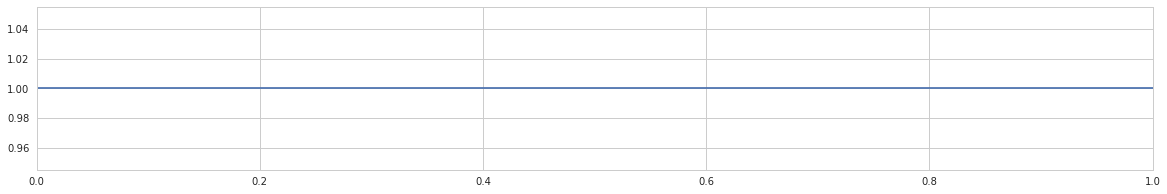

In [81]:
index = 0
pred_df.loc[index:index+24]['swell'].plot()

In [79]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
0        2 non-null int64
1        2 non-null float64
swell    2 non-null int64
dtypes: float64(1), int64(2)
memory usage: 128.0 bytes


In [80]:
test['pred'] = pred_df['swell'].tolist()

ValueError: Length of values does not match length of index

In [ ]:
index=576
test.iloc[index:index+24].T

In [ ]:
eval_metric = evaluation(df['swell(t+1)'].apply(output_change))

In [ ]:
scores = []
for day in range(25):
    st = day*24
    print(st)
    scores.append(eval_metric.evaluate(test['pred'][st:st + 24]))

print('최종점수', pd.DataFrame(scores).sum()[0],pd.DataFrame(scores).sum()[1])